# Лабораторна робота 2В. Багатошаровий персептрон
Виконав студент групи ФІ-21, Голуб Михайло

In [162]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install kagglehub[pandas-datasets]

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Набір даних ECG Heartbeat Categorization Dataset

### Опис датасету
This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification, the MIT-BIH Arrhythmia Dataset and The PTB Diagnostic ECG Database. The number of samples in both collections is large enough for training a deep neural network.

This dataset has been used in exploring heartbeat classification using deep neural network architectures, and observing some of the capabilities of transfer learning on it. The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and the cases affected by different arrhythmias and myocardial infarction. These signals are preprocessed and segmented, with each segment corresponding to a heartbeat.

#### Content

##### Arrhythmia Dataset
* Number of Samples: 109446
* Number of Categories: 5
* Sampling Frequency: 125Hz
* Data Source: Physionet's MIT-BIH Arrhythmia Dataset
* Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

##### The PTB Diagnostic ECG Database
* Number of Samples: 14552
* Number of Categories: 2
* Sampling Frequency: 125Hz
* Data Source: Physionet's PTB Diagnostic Database

Remark: All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.

#### Data Files
This dataset consists of a series of CSV files. Each of these CSV files contain a matrix, with each row representing an example in that portion of the dataset. The final element of each row denotes the class to which that example belongs.

### Використання даних
В даній роботі будуть використані дані з датасету аритмії з класами:

0. "N" Normal heartbeat (including normal beats, left/right bundle branch block, atrial escape, nodal escape) 
1. "S" Supra-ventricular premature beat (including atrial premature, aberrant atrial premature, nodal premature, supra-ventricular premature) 
1. "V" Ventricular beat (including premature ventricular contraction, ventricular escape) 
1. "F" Fusion beat of ventricular + normal 
1. "Q" Unclassifiable beat (including paced beats, fusion of paced & normal, and other unclassifiable)

Ці дані вже поділені на тестовий та навчальний датасети

### Завантаження даних

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\misha\.cache\kagglehub\datasets\shayanfazeli\heartbeat\versions\1


In [ ]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

matplotlib.rcParams['figure.figsize'] = (16, 10)

df_test = pd.read_csv(path+"\mitbih_test.csv", header = None)
df_train = pd.read_csv(path+"\mitbih_train.csv", header = None)
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Дані доповнені нулями щоб містити 188 значень в рядку, де 187 колонка це клас від 0 до 4. З набору даних можна виключити праві колонки з високою кількістю пустих значень, оскільки вони не несуть значної кількості корисної інформації, але потребуватимуть ускладнення персептрона.

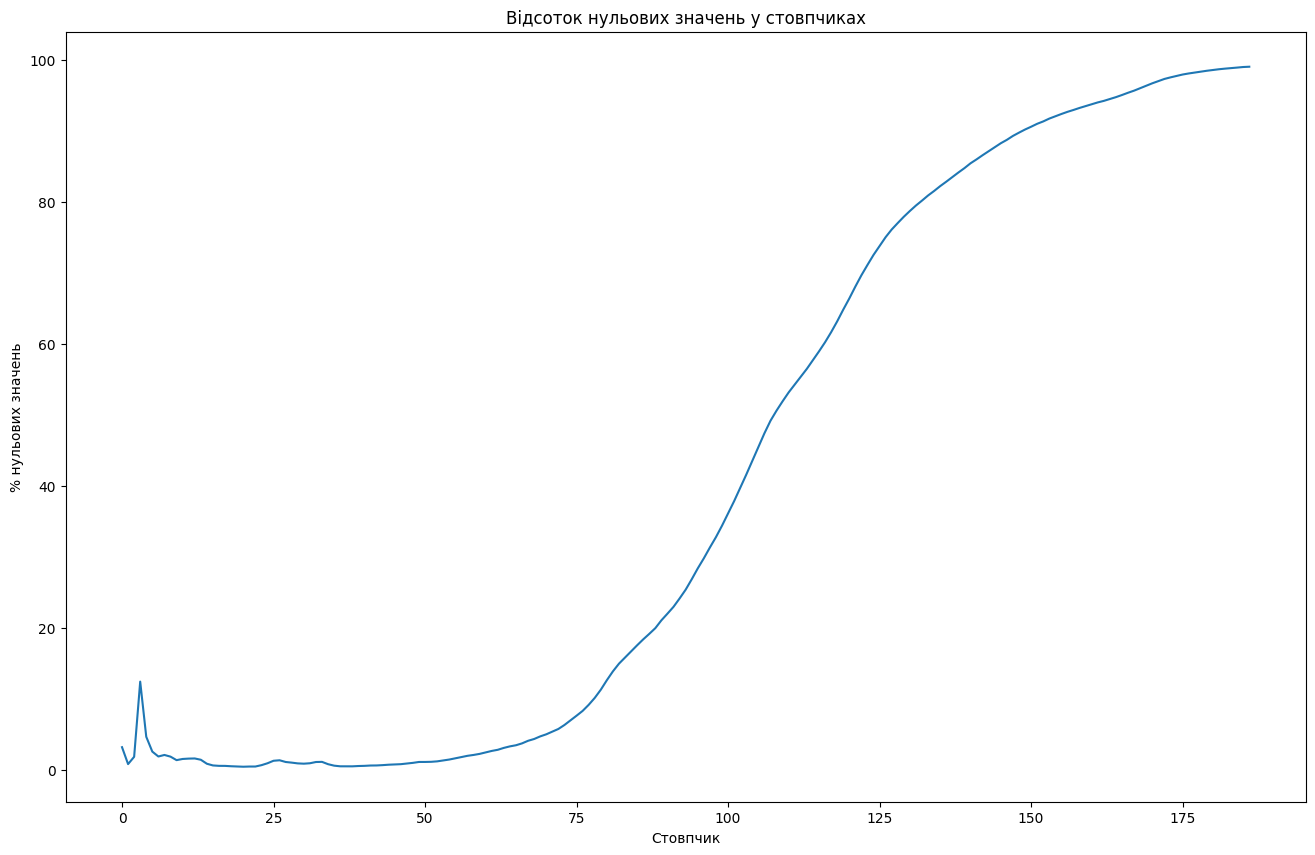

In [ ]:
zeros_in_columns = (len(df_train) - np.count_nonzero(df_train.drop(187, axis=1), axis = 0))*100/len(df_train)
plt.plot(range(zeros_in_columns.shape[0]), zeros_in_columns)
plt.title("Відсоток нульових значень у стовпчиках")
plt.xlabel("Стовпчик")
plt.ylabel("% нульових значень")
pass

В якості корисних даних обрано перші 64 значень, як такі що містять незначну кылькысть нульових значень

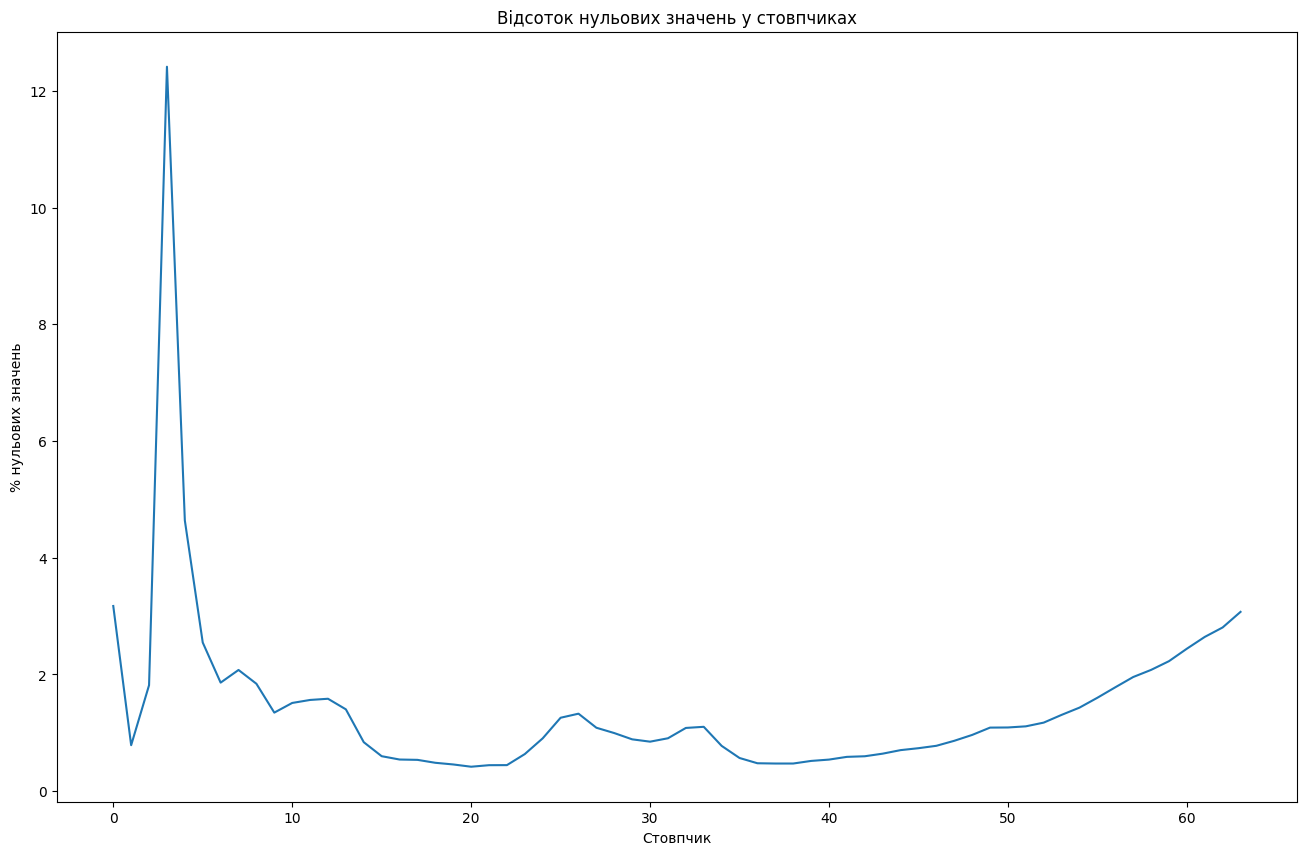

In [ ]:
zeros_in_columns = (len(df_train) - np.count_nonzero(df_train.drop(list(range(64,188)), axis=1), axis = 0))*100/len(df_train)
plt.plot(range(zeros_in_columns.shape[0]), zeros_in_columns)
plt.title("Відсоток нульових значень у стовпчиках")
plt.xlabel("Стовпчик")
plt.ylabel("% нульових значень")
pass

In [ ]:
df_test = df_test.drop(list(range(64,187)), axis=1)
df_train = df_train.drop(list(range(64,187)), axis=1)

Також не несуть корисної інформації рядки що повністю або майже частково складаються з нулів

Межа 99% даних: 13


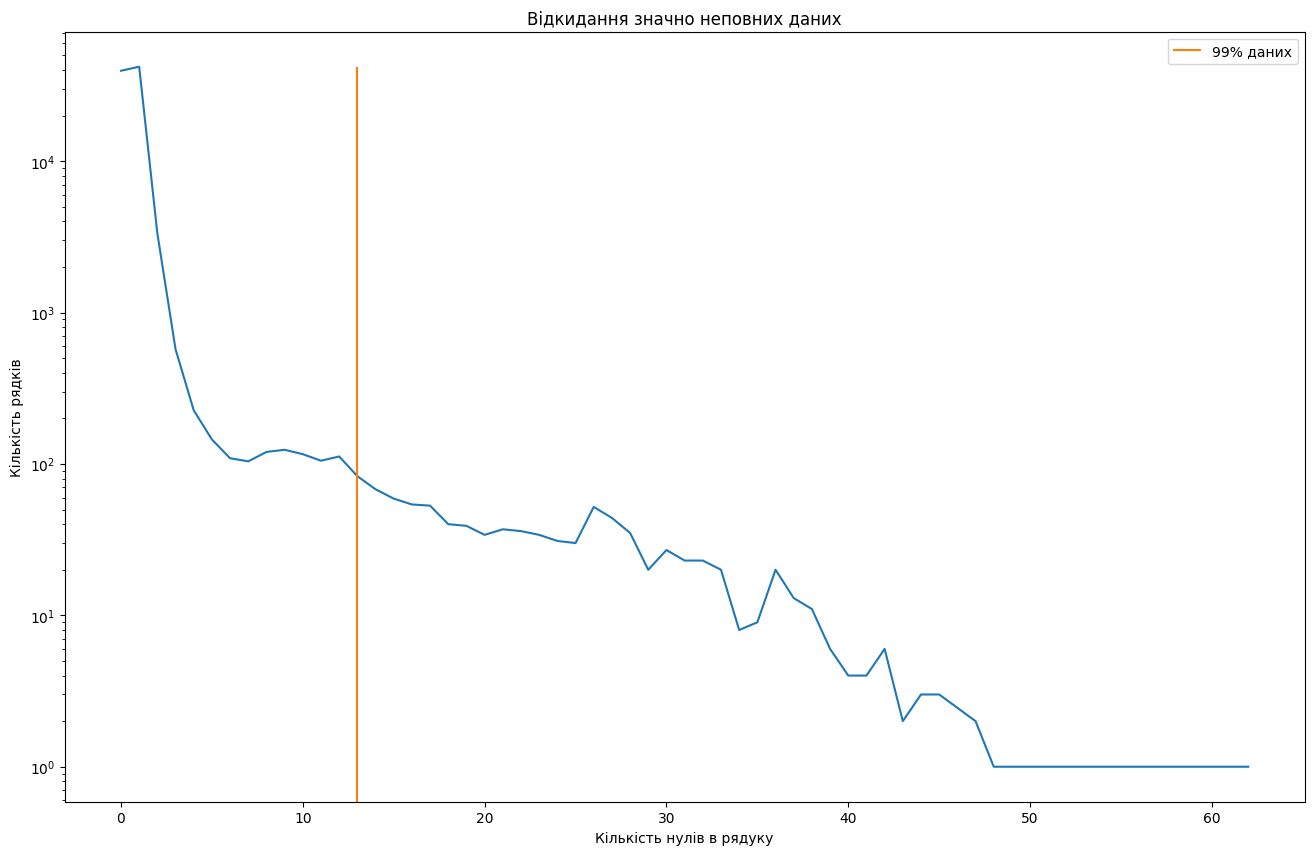

In [ ]:
zeros_in_rows = (len(df_train.columns) - 1 - np.count_nonzero(df_train.drop(187, axis=1), axis = 1))
rows_count = np.unique(zeros_in_rows, return_counts=True)
plt.plot(rows_count[0], rows_count[1])


counter = 0
zeros_sum = np.sum(rows_count[1])
divider = 0.99
line = 0
for i in range(len(rows_count[0])):
    counter += rows_count[1][i]
    if counter > zeros_sum * divider:
        line = rows_count[0][i]
        break
print("Межа 99% даних:", line)
plt.vlines(line, 0 ,max(rows_count[1]), colors = "C1", label = "99% даних")
plt.yscale("log")
plt.title("Відкидання значно неповних даних")
plt.xlabel("Кількість нулів в рядуку")
plt.ylabel("Кількість рядків")
plt.legend()
pass

Таким чином можна з незначними наслідками відкинути рядки в яких більше 13 нулів

In [ ]:
drop_rows_indicies = np.where(zeros_in_rows > 13)[0]
df_train = df_train.drop(drop_rows_indicies, axis = 0)

Приклади рядків з отриманого набору даних:

(<Axes: >, [<matplotlib.lines.Line2D at 0x29f9f952650>])

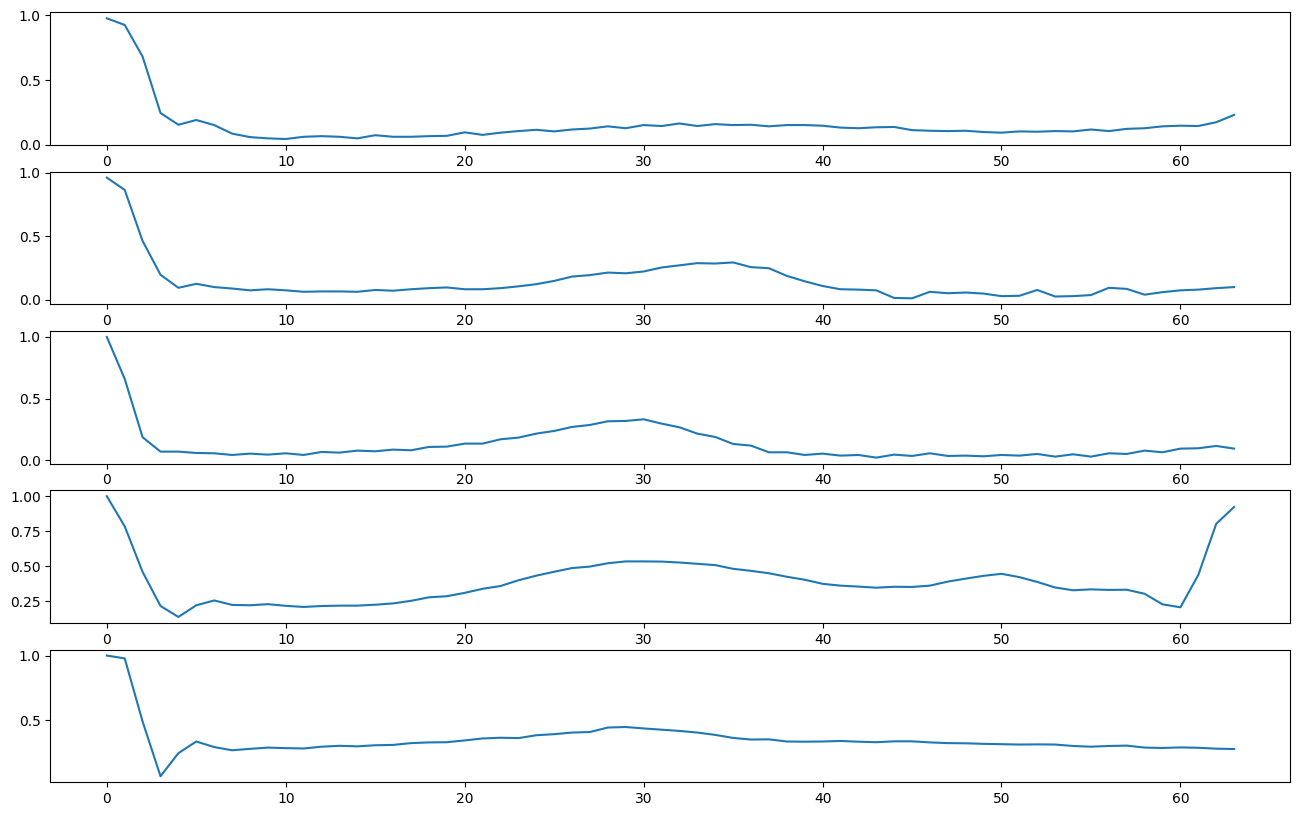

In [ ]:
plt.subplot(511), plt.plot(df_train.drop(187,axis = 1).loc[0])
plt.subplot(512), plt.plot(df_train.drop(187,axis = 1).loc[1])
plt.subplot(513), plt.plot(df_train.drop(187,axis = 1).loc[2])
plt.subplot(514), plt.plot(df_train.drop(187,axis = 1).loc[100])
plt.subplot(515), plt.plot(df_train.drop(187,axis = 1).loc[20000])

# Побудова багатошарового персептрона

На вхід подається 64 значення від 0 до 1 у вигляді вектора. На вихід персептрон має видати один з 5 класів.
Можна використати шари:
1. Вхідний шар з 64 значеннями
1. Dense шар з 64 нейронами
1. Dense шар з 32 нейронами
1. Dense шар з 16 нейронами
1. Вихідний шар з 5 нейронами і активацією SoftMax

### Функції необхідні для MLP

In [ ]:
def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / np.sum(exp_x)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

def categorical_crossentropy(y_true, y_pred):
    eps = 1e-9
    return -np.sum(y_true * np.log(y_pred + eps))

def categorical_crossentropy_deriv(y_true, y_pred):
    eps = 1e-9
    return -(y_true / (y_pred + eps))

### Окремий нейрон

In [ ]:
class Neuron:
    def __init__(self, n_inputs, activation_function, activation_deriv):
        self.weights = np.random.randn(n_inputs + 1) * 0.1
        self.activation_function = activation_function
        self.activation_deriv = activation_deriv
        self.last_input = None
        self.last_z = None

    def calc(self, x_with_bias):
        self.last_input = x_with_bias
        self.last_z = np.dot(self.weights, x_with_bias)
        return self.activation_function(self.last_z)

### Шар нейронів

In [ ]:
class DenseLayer:
    def __init__(self, n_inputs, n_neurons, activation_function, activation_deriv):
        self.W = np.random.randn(n_inputs, n_neurons) * 0.1
        self.b = np.zeros((1, n_neurons))
        self.activation_function = activation_function
        self.activation_deriv = activation_deriv
        self.last_input = None
        self.last_z = None
        self.last_output = None

    def forward(self, X):
        self.last_input = X
        self.last_z = X @ self.W + self.b
        self.last_output = self.activation_function(self.last_z)
        return self.last_output

    def backward(self, grad_output, lr):
        dZ = grad_output * self.activation_deriv(self.last_z)
        dW = self.last_input.T @ dZ
        db = np.sum(dZ, axis=0, keepdims=True)
        grad_input = dZ @ self.W.T
        self.W -= lr * dW
        self.b -= lr * db
        return grad_input

### Багатошаровий персептрон

In [ ]:
class MLP:
    def __init__(self, layer_sizes, lr=0.01):
        self.lr = lr
        self.layers = []
        for i in range(len(layer_sizes) - 2):
            self.layers.append(DenseLayer(layer_sizes[i], layer_sizes[i+1], relu, relu_deriv))
        self.layers.append(DenseLayer(layer_sizes[-2], layer_sizes[-1], softmax, lambda x: 1))  # derivative not used

    def forward(self, X):
        out = X
        for layer in self.layers:
            out = layer.forward(out)
        return out

    def backward(self, y_true, y_pred):
        grad = (y_pred - y_true) / y_true.shape[0]
        last_layer = self.layers[-1]
        dW = last_layer.last_input.T @ grad
        db = np.sum(grad, axis=0, keepdims=True)
        last_layer.W -= self.lr * dW
        last_layer.b -= self.lr * db
        grad_input = grad @ last_layer.W.T
        for layer in reversed(self.layers[:-1]):
            grad_input = layer.backward(grad_input, self.lr)

    def train(self, X, Y, epochs=100):
        history = {
            "acc" : [],
            "loss" : [],
            "epoch" : []
        }
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = categorical_crossentropy(Y, y_pred)
            self.backward(Y, y_pred)
            if (epoch + 1) % 10 == 0 or epoch == 0:
                acc = np.mean(np.argmax(y_pred, axis=1) == np.argmax(Y, axis=1))
                print(f"Epoch {epoch+1:3d} | loss={loss:.0f} | acc={acc:.6f}")
                history["acc"].append(acc)
                history["loss"].append(loss)
                history["epoch"].append(epoch)

### Створення та тренування персептрону

In [ ]:
from sklearn.preprocessing import OneHotEncoder

model = MLP([64, 32, 16, 5], lr=0.001)
X = df_train.drop(187, axis=1).to_numpy()
y = df_train[187].to_numpy().reshape(-1, 1)

# One-hot
enc = OneHotEncoder(sparse_output=False)
Y = enc.fit_transform(y)
history = model.train(X, Y, epochs=1000)

Epoch   1 | loss=1126761 | acc=0.025
Epoch  10 | loss=1126336 | acc=0.025
Epoch  20 | loss=1125866 | acc=0.025
Epoch  30 | loss=1125397 | acc=0.026
Epoch  40 | loss=1124929 | acc=0.029
Epoch  50 | loss=1124463 | acc=0.033
Epoch  60 | loss=1123997 | acc=0.042
Epoch  70 | loss=1123532 | acc=0.101
Epoch  80 | loss=1123069 | acc=0.216
Epoch  90 | loss=1122606 | acc=0.334
Epoch 100 | loss=1122144 | acc=0.418
Epoch 110 | loss=1121683 | acc=0.507
Epoch 120 | loss=1121223 | acc=0.588
Epoch 130 | loss=1120763 | acc=0.643
Epoch 140 | loss=1120304 | acc=0.689
Epoch 150 | loss=1119846 | acc=0.732
Epoch 160 | loss=1119388 | acc=0.761
Epoch 170 | loss=1118931 | acc=0.778
Epoch 180 | loss=1118474 | acc=0.787
Epoch 190 | loss=1118017 | acc=0.795
Epoch 200 | loss=1117561 | acc=0.802
Epoch 210 | loss=1117105 | acc=0.808
Epoch 220 | loss=1116649 | acc=0.812
Epoch 230 | loss=1116194 | acc=0.818
Epoch 240 | loss=1115738 | acc=0.823
Epoch 250 | loss=1115283 | acc=0.827
Epoch 260 | loss=1114827 | acc=0.829
E